Let us do some univariate analysis in this notebook and build simple regression models.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from src import kagglegym

Read the train file from Kaggle gym.

In [4]:
# Create environment
env = kagglegym.make()

# Get first observation
observation = env.reset()

# Get the train dataframe
train = observation.train

In [5]:
train.shape

(806298, 111)

In [6]:
mean_values = train.mean(axis=0)
train.fillna(mean_values, inplace=True)
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-6.316399e-03,0.222831,-0.213030,0.729277,-0.335633,1.132921e-01,1.621238,...,0.775208,-0.098557,-0.090948,-0.080027,-0.414776,0.00601,-0.028033,-2.0,0.000783,-0.011753
1,11,0,0.014765,-3.806422e-02,-0.017425,0.320652,-0.034134,0.004413,1.142851e-01,-0.210185,...,0.025590,-0.098557,-0.090948,-0.080027,-0.273607,0.00601,-0.028033,-2.0,0.000783,-0.001240
2,12,0,-0.010622,-5.057707e-02,3.379575,-0.157525,-0.068550,-0.155937,1.219439e+00,-0.764516,...,0.151881,-0.098557,-0.090948,-0.080027,-0.175710,0.00601,-0.028033,-2.0,0.000783,-0.020940
3,25,0,-9.463644,3.195843e+11,-0.835275,-0.856674,37.132420,0.178495,-1.254203e+09,-0.007262,...,1.035936,-0.098557,-0.090948,-0.080027,-0.211506,0.00601,-0.028033,-2.0,0.000783,-0.015959
4,26,0,0.176693,-2.528418e-02,-0.057680,0.015100,0.180894,0.139445,-1.256869e-01,-0.018707,...,0.630232,-0.098557,-0.090948,-0.080027,-0.001957,0.00601,-0.028033,0.0,0.000783,-0.007338


**Correlation coefficient plot:**

Let us look at the correlation of each of the variables with the target variables to get some important variables to be used for our next steps.

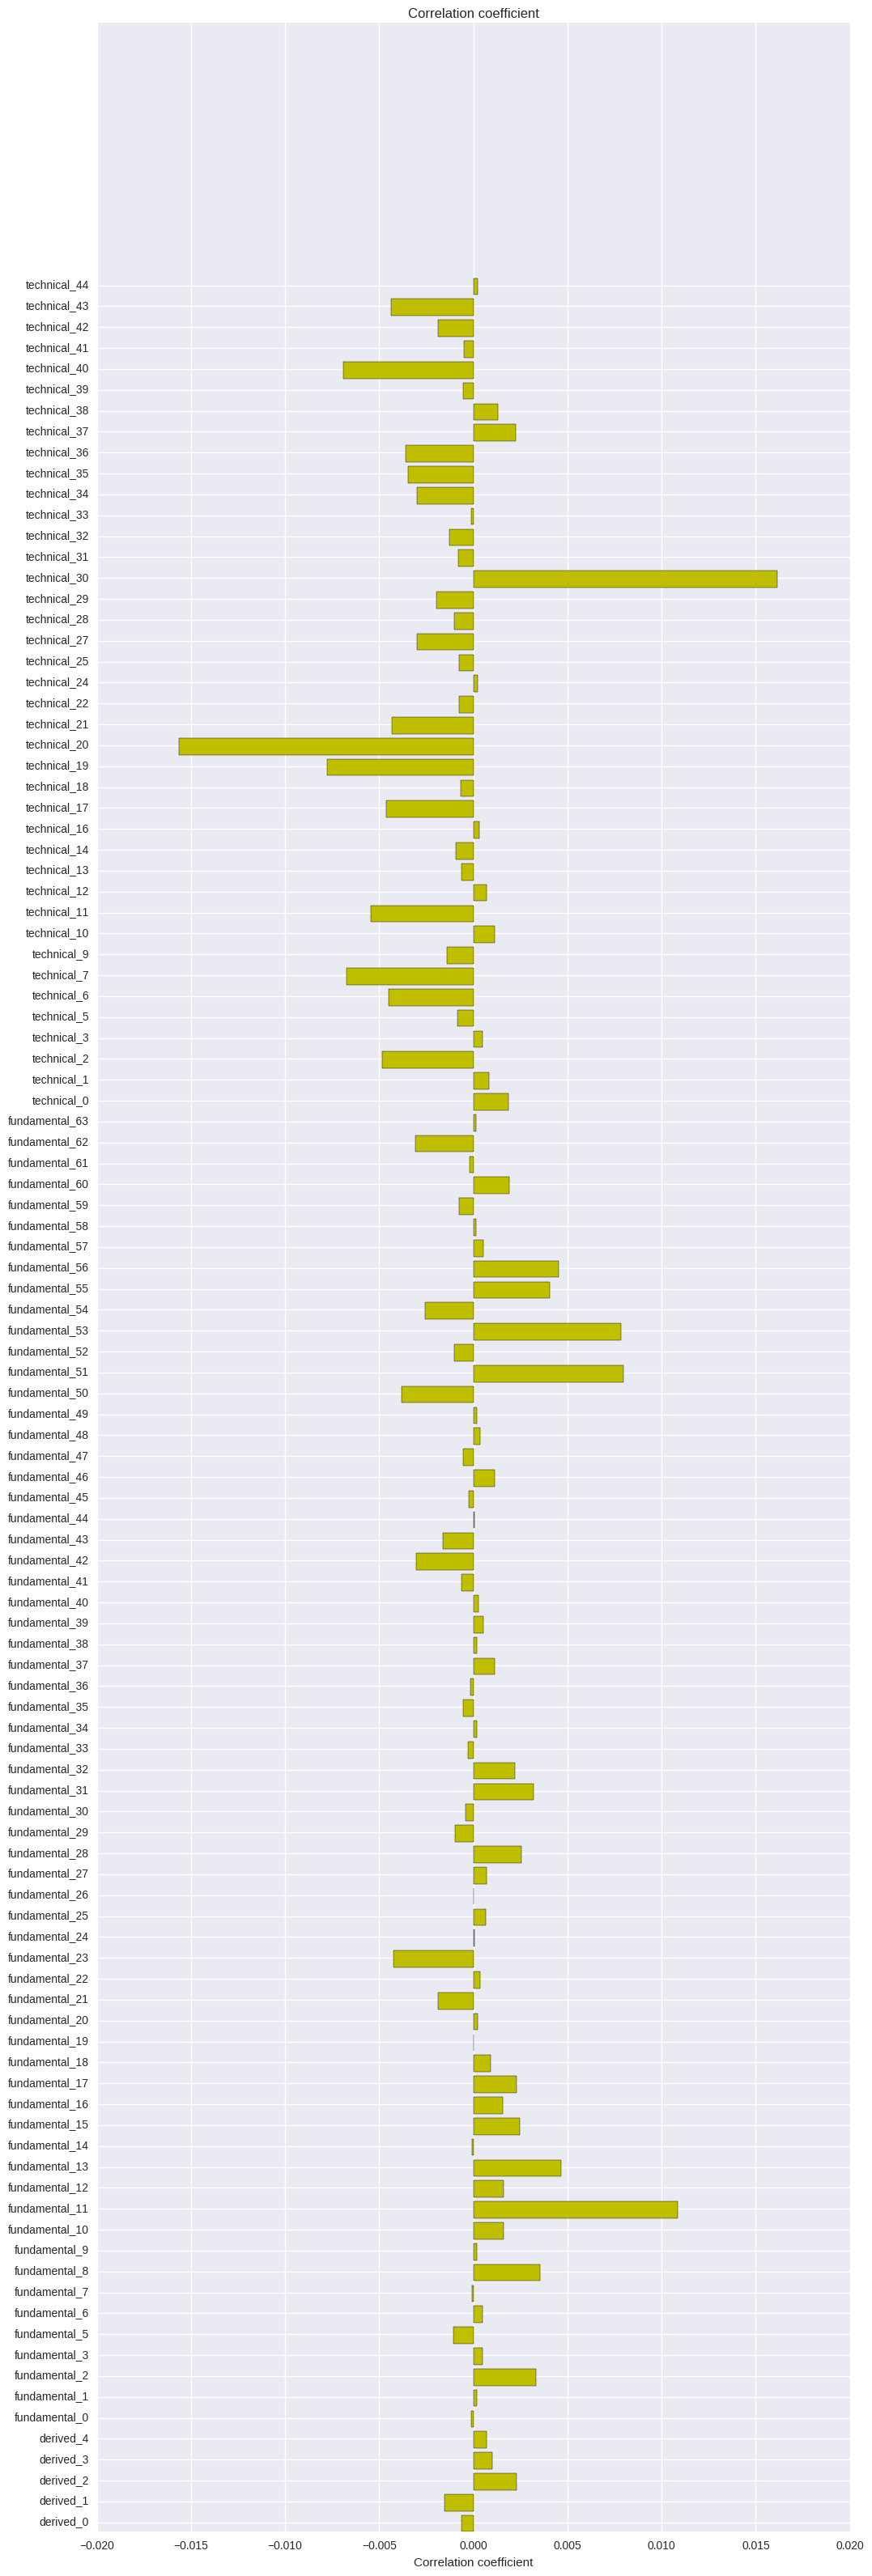

In [7]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train.columns if col not in ['id','timestamp','y']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.y.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.show()

As expected, the correlation coefficient values are very low and the maximum value is around 0.016 (in both positive and negative) as seen from the plot above.

Let us take the top 4 variables from the plot above and do some more analysis on them alone.

 - technical_30
 - technical_20
 - fundamental_11
 - technical_19

As a first step, let us get the correlation coefficient in between these variables. 

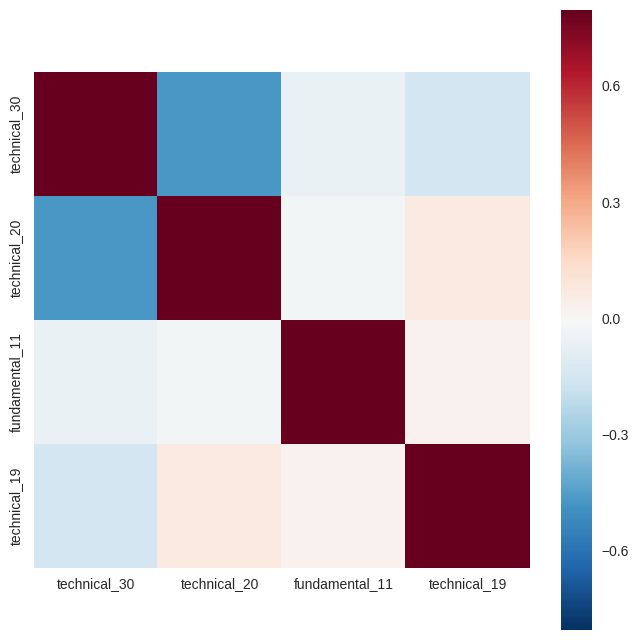

In [8]:
cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']

temp_df = train[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There is some negative correlation between 'technical_30' and 'technical_20'. 

As the next step, let us build simple linear regression models using these variables alone and see how they perform.

Let us first build our models.

In [9]:
models_dict = {}
for col in cols_to_use:
    model = lm.LinearRegression()
    model.fit(np.array(train[col].values).reshape(-1,1), train.y.values)
    models_dict[col] = model

So we have built 4 univariate models using the train data.

**Technical_30:**

So we will start predicting with the model using 'technical_30' variable.

In [10]:
col = 'technical_30'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800


{'public_score': 0.011845370226513687}

We are getting a public score of 0.011 using this variable.

**Technical_20:**

Now let us predict the test using our second univariate model which we have built.

In [11]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'technical_20'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800


{'public_score': 0.016953037728581258}

Using 'technical_20' as input variable, we are getting a public score of 0.0169 which is slightly better than the previous one.

Submitting this model to the LB gave me a score of 0.006. I have exported the above script into a kernel and it can be accessed [here][1].  

Let us do the same for our last two variables as well.

**Fundamental_11:**


  [1]: https://www.kaggle.com/sudalairajkumar/two-sigma-financial-modeling/univariate-model

In [12]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'fundamental_11'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800


{'public_score': -0.0018685773665852821}

**Technical_19:**

In [11]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'technical_19'
model = models_dict[col]
while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800


{'public_score': 0.0066252988079944057}

**Regression using all 4 variables:**

Now let us build multiple regression model using all these 4 variables.

In [12]:
cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']

# Get first observation
env = kagglegym.make()
observation = env.reset()
train = observation.train
train.fillna(mean_values, inplace=True)

model = lm.LinearRegression()
model.fit(np.array(train[cols_to_use]), train.y.values)

while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[cols_to_use])
    observation.target.y = model.predict(test_x)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800


{'public_score': 0.019545566459911509}

This multiple regression gave a score of 0.019 which is better than all univariate models. So probably submitting this model might give a better LB score.

**Model with Clipping:**

As we can see from this [script][1] which gives the best public LB score of 0.00911, clipping the 'y' values help. 

So let us dig a little deeper to see why the public LB score increased from 0.006 to 0.009 when we clip the 'y' values.

  [1]: https://www.kaggle.com/bguberfain/two-sigma-financial-modeling/univariate-model-with-clip/run/482189/code

In [13]:
print("Max y value in train : ",train.y.max())
print("Min y value in train : ",train.y.min())

Max y value in train :  0.0934978
Min y value in train :  -0.0860941


Let us now do the clipping and see the number of rows that will be discarded from the training. 

In [14]:
low_y_cut = -0.086093
high_y_cut = 0.093497

y_is_above_cut = (train.y > high_y_cut)
y_is_below_cut = (train.y < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)
y_is_within_cut.value_counts()

True     796880
False      9418
Name: y, dtype: int64

So there are 9418 rows in the training set that lie between (-0.086093 and -0.0860941) and (0.093497 and 0.0934978) in the training set. So many values in such a small range.

As we can see from [anokas script][1], the distribution of 'y' values have two small spikes at both the ends. Probably values which are higher than these values are clipped in the training data and so not using these rows in our model building might be a good idea.



Now let us re-train our model (using technical_20) by excluding these rows from the training.


  [1]: https://www.kaggle.com/anokas/two-sigma-financial-modeling/two-sigma-time-travel-eda

In [15]:
# Get first observation
env = kagglegym.make()
observation = env.reset()

col = 'technical_20'
model = lm.LinearRegression()
model.fit(np.array(train.loc[y_is_within_cut, col].values).reshape(-1,1), train.loc[y_is_within_cut, 'y'])

while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features[col].values).reshape(-1,1)
    observation.target.y = model.predict(test_x).clip(low_y_cut, high_y_cut)
    #observation.target.fillna(0, inplace=True)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = env.step(target)
    if done:
        break
info

Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800


{'public_score': 0.016922777420276997}

So we got almost same public score of 0.0169 with clip.

But on the leaderboard, we are getting some improvement in the score from 0.006 to 0.009. 

Hope this gives a good starting point for building models. Happy Kaggling under new environment.!